# **Image Classification: A Comparison of Manhattan (L1) and Euclidean (L2) Distances with 5-fold Cross-Validation**

In [3]:
from google.colab import drive
import zipfile
import os

drive.mount('/content/drive')


zip_path = '/content/drive/MyDrive/animal_dataset.zip'
extract_path = '/content/dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset extracted successfully.


In [4]:
import cv2
import numpy as np
import os

# Define image properties
IMG_SIZE = 32
DATA_DIR = os.path.join(extract_path, 'animal_dataset')

data = []
labels = []
classes = os.listdir(DATA_DIR)

print(f"Classes found: {classes}")

for category in classes:
    path = os.path.join(DATA_DIR, category)
    class_num = classes.index(category)

    for img_name in os.listdir(path):
        try:
            # Read image
            img_path = os.path.join(path, img_name)
            img_array = cv2.imread(img_path)

            # Convert to Grayscale
            gray_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

            # Resize to 32x32
            resized_img = cv2.resize(gray_img, (IMG_SIZE, IMG_SIZE))

            data.append(resized_img.flatten())
            labels.append(class_num)
        except Exception as e:
            pass


X = np.array(data)
y = np.array(labels)

print(f"Total images loaded: {len(X)}")
print(f"Feature shape: {X.shape}")

Classes found: ['panda', 'dog', 'cat']
Total images loaded: 300
Feature shape: (300, 1024)


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

k_values = range(1, 21)
l1_accuracies = [] # Manhattan
l2_accuracies = [] # Euclidean

print("Starting 5-Fold Cross-Validation...")

for k in k_values:

    knn_l1 = KNeighborsClassifier(n_neighbors=k, p=1, metric='manhattan')
    scores_l1 = cross_val_score(knn_l1, X, y, cv=5, scoring='accuracy')
    l1_accuracies.append(scores_l1.mean())


    knn_l2 = KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean')
    scores_l2 = cross_val_score(knn_l2, X, y, cv=5, scoring='accuracy')
    l2_accuracies.append(scores_l2.mean())

print("Evaluation complete.")

Starting 5-Fold Cross-Validation...
Evaluation complete.


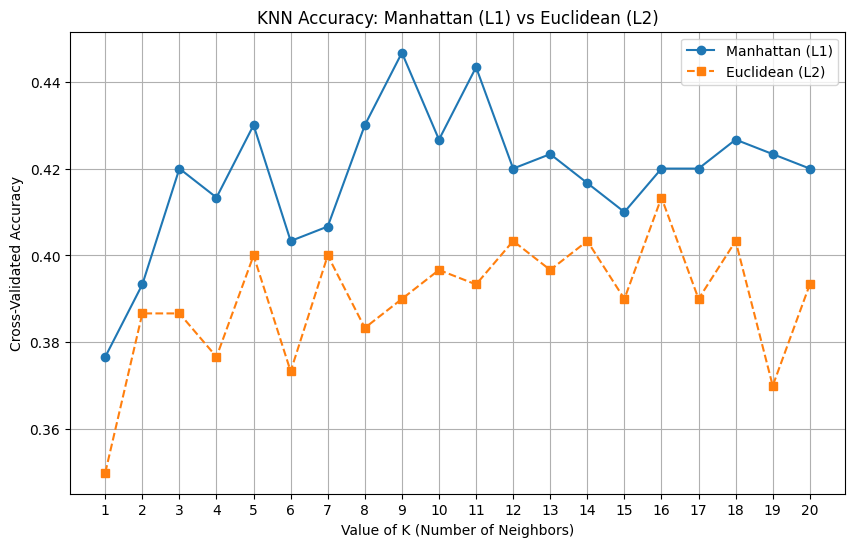

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, l1_accuracies, label='Manhattan (L1)', marker='o', linestyle='-')
plt.plot(k_values, l2_accuracies, label='Euclidean (L2)', marker='s', linestyle='--')

plt.title('KNN Accuracy: Manhattan (L1) vs Euclidean (L2)')
plt.xlabel('Value of K (Number of Neighbors)')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

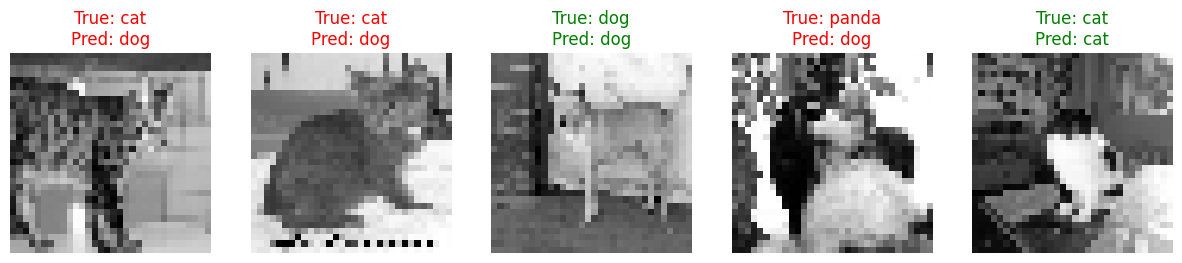

In [7]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

best_k = 5

model = KNeighborsClassifier(n_neighbors=best_k, p=1, metric='manhattan')
model.fit(X_train, y_train)

predictions = model.predict(X_test[:5])

plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)

    img_display = X_test[i].reshape(IMG_SIZE, IMG_SIZE)
    plt.imshow(img_display, cmap='gray')

    true_label = classes[y_test[i]]
    pred_label = classes[predictions[i]]

    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
    plt.axis('off')

plt.show()